<a href="https://colab.research.google.com/github/rajeshchengannur/MachineLearning/blob/main/DescitionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#The model will predict the quality of the wine
import pandas as pd
import numpy as np

wine_data = pd.read_csv('winequality-white.csv',sep=r'\s*;\s*')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [4]:
wine_data.describe()

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
#Removing the double quotes from column headers
new_headers = []

for header in wine_data.columns: # data.columns is your list of headers
    header = header.strip('"') # Remove the quotes off each header
    new_headers.append(header) # Save the new strings without the quotes

wine_data.columns = new_headers # Replace the old headers with the new list


In [11]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<function matplotlib.pyplot.show>

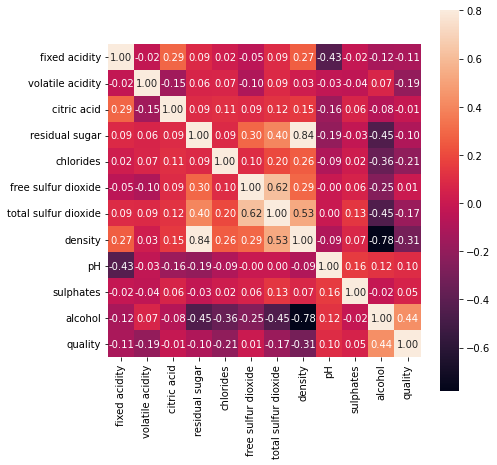

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = wine_data.corr()
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,fmt='0.2f')
plt.show

In [14]:
X = wine_data.drop('quality',axis=1)
y = wine_data['quality']

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=0)

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier  # Train with the default classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
classifier.fit(x_train,y_train)
score = classifier.score(x_test,y_test)
print(score)

0.5826530612244898


In [19]:
# This gives howmany features are used by the classifier
classifier.n_features_

11

In [20]:
#Importance of features and how much its is affected
classifier.feature_importances_

array([0.07852998, 0.09053579, 0.07848337, 0.06994351, 0.08594454,
       0.11173532, 0.09397661, 0.08449092, 0.08653793, 0.0829163 ,
       0.13690574])

In [24]:
# In order to visualize the tree
#graphviz can be downloaded from https://graphviz.gitlab.io/download/
import sklearn.tree as tree
tree.export_graphviz(classifier,out_file='tree.dot',feature_names=X.columns)

In [25]:
from subprocess import call
call(['dot','-T','png','tree.dot','-o','tree.png'])
# This will create a png . Some times its very difficult to open the tree.png because the file size if huge.
#We can reduce the descition tree by using max_depth parameter in the classifier


0

In [27]:
#Tweek the model and find the score
classifier = DecisionTreeClassifier(max_depth=5,max_features=4,criterion='entropy')
classifier.fit(x_train,y_train)
score = classifier.score(x_test,y_test)
print(score)

0.4928571428571429


In [28]:
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)
score = classifier.score(x_test,y_test)
print(score)

0.5642857142857143
